<a href="https://colab.research.google.com/github/wordman2/GINN/blob/main/Colab_11_jonas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GINN Teil 11

## Imports

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import widgets
import matplotlib.pyplot as plt
import seaborn as sns
import gensim.downloader as api
#model = api.load("glove-wiki-gigaword-50")
model = api.load("glove-twitter-50")

[==================================================] 100.0% 199.5/199.5MB downloaded





## Wortvektoren in der freien Wildbahn

In [ ]:


def plot_embeddings(vectors, labels=None):
    n_vectors = len(vectors)
    fig = plt.figure(figsize=(12, n_vectors))
    # ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    # ax = fig.add_axes([1, 1, 1, 1])
    ax = plt.gca()

    sns.heatmap(vectors, cmap='RdBu', vmax=2, vmin=-2, ax=ax)

    if labels:
        ax.set_yticklabels(labels,rotation=0)
        ax.tick_params(axis='both', which='major', labelsize=30)

    plt.tick_params(axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off

    # From https://github.com/mwaskom/seaborn/issues/1773
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!
def multiplot_embedings(wort1, wort2, wort3, wort4, wort5, wort6):
    plot_embeddings([model[wort1], model[wort2], model[wort3], model[wort4],  model[wort5], model[wort6]],
              [wort1, wort2, wort3, wort4, wort5, wort6])
    #return "FERTIG"
im = interact_manual(multiplot_embedings, wort1="king", wort2="man", wort3="woman", wort4="queen", wort5="girl", wort6="boy")
im.widget.children[6].description = 'b) Graphisch Darstellen (englisch)'
im.widget.children[6].layout = widgets.Layout(width='auto')

interactive(children=(Text(value='king', description='wort1'), Text(value='man', description='wort2'), Text(va…

In [ ]:
def getMostSimilar(positiv1, positiv2, negativ):
    return model.most_similar(positive=[positiv1, positiv2], negative=[negativ])
im = interact_manual(getMostSimilar, positiv1="king", positiv2="woman", negativ="man")
im.widget.children[0].description = 'Ausgangswort (englisch)'
im.widget.children[1].description = '+'
im.widget.children[2].description = '-'
im.widget.children[3].description = 'c) Berechnen'

interactive(children=(Text(value='king', description='positiv1'), Text(value='woman', description='positiv2'),…

Experimentieren Sie mit den Visualisierungen und Ähnlichkeitsberechnungen auf unterschiedlichen Embedding-Repräsentationen. Das zweite Widget ermittelt die ähnlichsten Vektoren zum Ergebnisvektor der Berechnung auf Basis der Kosinus-Ähnlichkeit. Somit können Sie eine direkte Ähnlichkeitssuche nach X durchführen, indem Sie A+X-A berechnen.

Das Laden der Embedding-Repräsentation kann jeweils einige Zeit in Anspruch nehmen.

## Alternative Seq2Seq Architektur



Da ab 01.04.2024 in Deutschland Cannabis freigegeben wurde, kommt Ihr Kommilitone auf die kreative Idee, Encoder und Decoder eines RNN-Übersetzers nicht "horizontal" zu verketten, sondern "vertikal" aufeinanderzustapeln. Somit würde, abweichend zur ursprünglichen Architektur, der Decoder bei jedem Token t den aktuellen Hidden State des Encoders übergeben bekommen. Diskutieren Sie diese Idee.

## Seq2Seq zu Fuß ausrechnen





Gegeben ist ein simples RNN-basiertes seq2seq zur Zusammenfassung von Texten.

Das Einabevokabular besteht aus den Embeddings:
* $x_{ginn} = [0,1]^\intercal$
*$x_{ist} = [1,0]^\intercal$
* $x_{super} = [-1,-1]^\intercal$
* $x_{toll} = [2,-1]^\intercal$
*$x_{!!!} = [-1,2]^\intercal$
* $x_{\#GINN} = [0,-1]^\intercal$
* $x_{<EOS>} = [1,1]^\intercal$

Das Ausgabevokabular ist identisch mit dem Eingabevokabular, aber one-hot-encoded:
* $x_{ginn} = [1,0,0,0,0,0,0]^\intercal$
*$x_{ist} = [0,1,0,0,0,0,0]^\intercal$
* $x_{super} = [0,0,1,0,0,0,0]^\intercal$
* $x_{toll} = [0,0,0,1,0,0,0]^\intercal$
*$x_{!!!} = [0,0,0,0,1,0,0]^\intercal$
* $x_{\#GINN} = [0,0,0,0,0,1,0]^\intercal$
* $x_{<EOS>} = [0,0,0,0,0,0,1]^\intercal$


Wir verwenden ein "plain vanilla" RNN ohne Bias-Vektoren mit ReLU Aktivierung, d.h. der Ausgabe-Hidden-State wird mit $h(t)=relu(W_{hx}x_{\cdot} + W_{hh}h_{t-1})$ berechnet.

Der initiale hidden state des RNNs ist mit 0ern initialisiert. $W_{hh}$ ist die Identitätsmatrix.

$
W{}_{hx} = \left[ {\begin{array}{*{20}c}
   0 & { - 1}   \\
   2 & 0   \\
   1 & 1   \\
\end{array}} \right]
$

Berechnen Sie den letzten hidden State des Encoder RNNs für das Eingabedokument "ginn ist super <EOS>".

Sie verwenden anschließend das selbe RNN, um basierend auf dem aktuellen hidden State die Ausgaben zu generieren.

Die Abbildung des hidden States auf eine Ausgabe y erfolgt mit $softmax(W_{hy}h_{t})$ bei


$
W_{yh}  = \left[ {\begin{array}{*{20}c}
   0 & { - 1} & 0  \\
   0 & 1 & { - 1}  \\
   { - 2} & 1 & 0  \\
   0 & 0 & -1  \\
   1 & 2 & 0  \\
   0 & 0 & 0  \\
   { - 2} & 0 & 1  \\
\end{array}} \right]
$

Berechnen Sie die ersten beiden Wörter, die das RNN nun ausgibt.



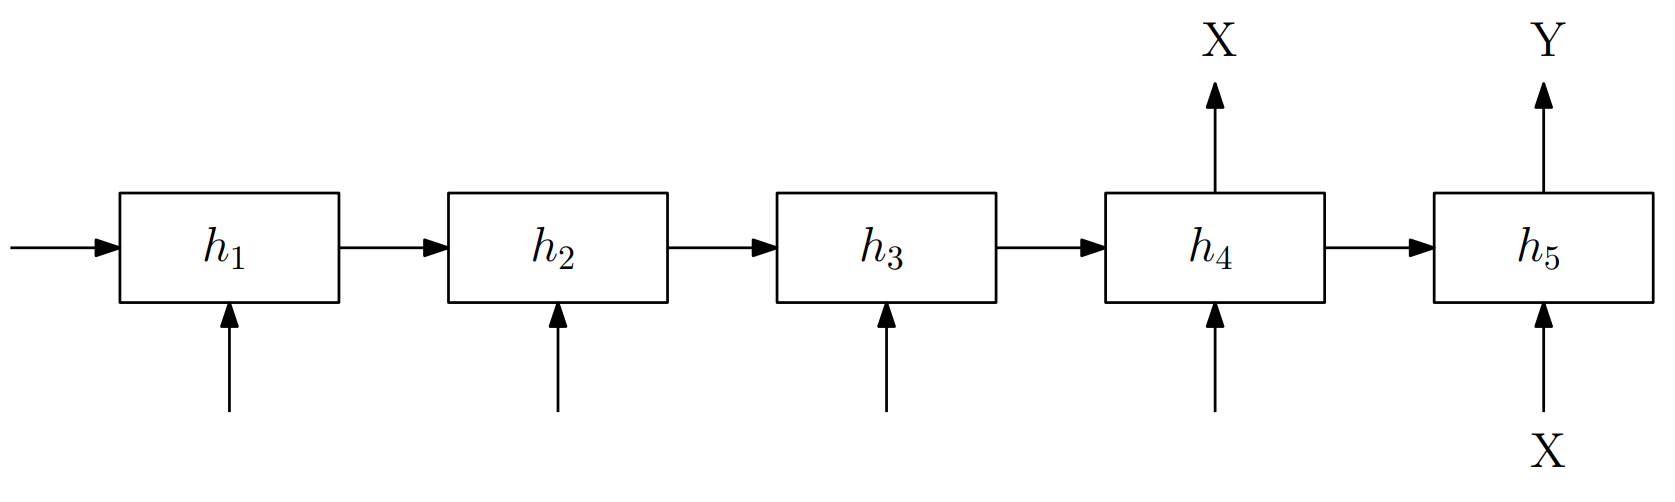

In [6]:
import numpy as np
from torch.nn import Softmax

def ReLU(x):
  return np.maximum(0, x)

def softmax(x):
  exp_logits = np.exp(x)
  return exp_logits / np.sum(exp_logits)


xginn=np.matrix([0,1]).T
xist=np.matrix([1,0]).T
xsuper=np.matrix([-1,-1]).T
xtoll =np.matrix([2,-1]).T
x___ = np.matrix([-1,2]).T
xGINN = np.matrix([0,-1]).T
xEOS = np.matrix([1,1]).T

input_vocab = np.hstack([xginn, xist, xsuper, xtoll, x___, xGINN, xEOS])


whx = np.matrix([[0, -1],
                 [2, 0],
                 [1, 1]])

wyh = np.matrix([[0, -1, 0],
                 [0, 1, -1],
                 [-2, 1, 0],
                 [0, 0, -1],
                 [1, 2, 0],
                 [0, 0, 0],
                 [-2, 0, 1]])

h1 = ReLU(whx*xginn)
h2 = ReLU(whx*xist + np.identity(3)*h1)
h3 = ReLU(whx*xsuper + np.identity(3)*h2)
h4 = ReLU(whx*xEOS + np.identity(3)*h3)
softmax_h4 = softmax(wyh*h4)
X_output = np.eye(7)[softmax_h4.argmax()]
X_input = input_vocab[:, softmax_h4.argmax()]
h5 = ReLU(whx*X_input + np.identity(3)*h4)
Y_output = np.eye(7)[(h5.argmax())]
print(X_output)
print(Y_output)

[0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0.]


## Seq2Seq Tutorial

Spielen Sie Teil 1 von https://github.com/bentrevett/pytorch-seq2seq durch. Welche Konzepte kennen Sie bereits aus der Vorlesung, welche müssen Sie ggf. noch recherchieren bzw. haben Fragen beim Verständnis? Notieren Sie sich diese als Fragen zur gemeinsamen Diskussion in der Lehrveranstaltung.

Wie verhält sich das Modell, wenn Sie Wörter eingeben, die nicht im Wörterbuch vorhanden sind?

Hinweis: Wenn Sie das Notebook nicht auf Colab sondern z.B. RosettaHub ausführen, setzen Sie bitte:

```python
from huggingface_hub.utils import _runtime
_runtime._is_google_colab = False
```





